In [1]:
# generate data for least squares polynomials

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

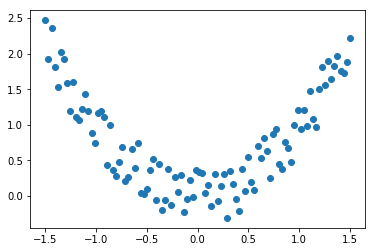

In [3]:
N = 100
x = np.linspace(-1.5, 1.5, N)
y = x**2 + 0.8 * (np.random.rand(N) - 0.5)
plt.plot(x,y,'o')

In [4]:
d = h5py.File('polynomial-ls-data.h5', 'w')
d['x'] = x[:]
d['y'] = y[:]
d.close()

In [5]:
## Third order polynomials (homework)

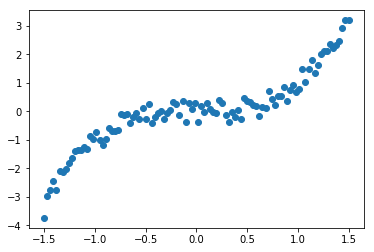

In [8]:
N = 100
x = np.linspace(-1.5, 1.5, N)
y = x**3 + 0.8 * (np.random.rand(N) - 0.5)
plt.plot(x,y,'o')

In [9]:
d = h5py.File('poly3-data.h5', 'w')
d['x'] = x[:]
d['y'] = y[:]
d.close()

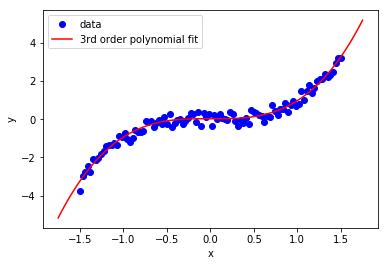

In [17]:
import scipy.sparse.linalg as sla
A = np.vstack((x**3, x**2, x, np.ones(x.shape))).T
Y = y
theta = sla.lsmr(A,Y)[0]
def yp(x, theta):
    return theta[0]*x**3 + theta[1]*x**2 + theta[2]*x + theta[3]

xp = np.linspace(-1.75, 1.75, 100)
plt.plot(x,y,'bo', label='data')
plt.plot(xp, yp(xp, theta), 'r-', label='3rd order polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()